### 완전 연결 계층 군집(hierarchical clustering using complete linkage)
1. 모든 샘플의 거리 행렬 계산
2. 모든 데이터 포인ㅌ트를 단일 클러스터로 표현
3. 가장 비슷하지 않은(멀리 떨어진) 샘플 사이 거리에 기초하여 가장 가까운 두 클러스터를 합침
4. 유사도 행렬 업데이트
5. 하나의 클러스터가 남을 때까지 2~4번 반복

In [1]:
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random((len(labels), len(variables)))
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,0.696469,0.286139,0.226851
ID_1,0.551315,0.719469,0.423106
ID_2,0.980764,0.684830,0.480932
ID_3,0.392118,0.343178,0.729050
ID_4,0.438572,0.059678,0.398044


In [3]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(
                        pdist(df, metric='euclidean')),
                        columns = labels, index = labels)
row_dist
# 거리를 구함

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,0.497353,0.551665,0.589989,0.383540
ID_1,0.497353,0.000000,0.434707,0.510431,0.669823
ID_2,0.551665,0.434707,0.000000,0.724426,0.831659
ID_3,0.589989,0.510431,0.724426,0.000000,0.438286
ID_4,0.383540,0.669823,0.831659,0.438286,0.000000


In [4]:
# 완전 연결 병합 적용
# 축약된 거리 행렬(상삼각 행렬(upper triangular matrix))을 입력 속성으로 사용
# 연결 행렬 (linkage matrix) 반환
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric = 'euclidean'),
                       method = 'complete')

# 가장 먼 거리를 기준으로 군집화 진행

pd.DataFrame(row_clusters,
             columns = ['row label 1',
                        'row label 2',
                        'distance',
                        'no. of items in clust.'],
             index = ['cluster %d' %(i +1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,0.383540,2.0
cluster 2,1.0,2.0,0.434707,2.0
cluster 3,3.0,5.0,0.589989,3.0
cluster 4,6.0,7.0,0.831659,5.0


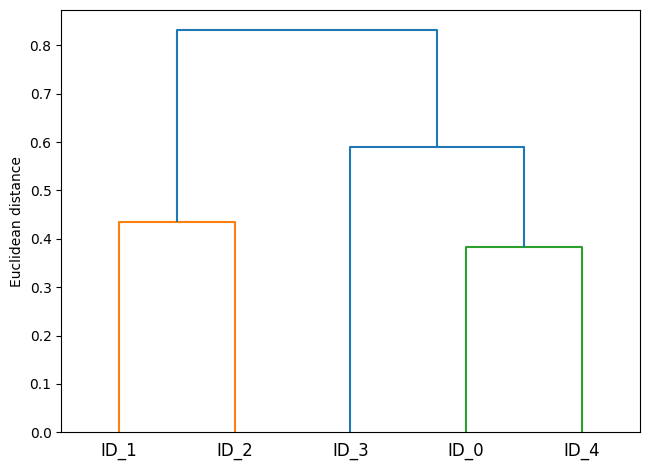

In [5]:
# 연결 행렬을 덴드로그램으로 그리기
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
# 덴드로그램은 색이 다양함.
# 검은색으로 보고싶다면 아래의 코드 주석 해제

# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters,
                       labels = labels,
                       # color_threshold = np.inf
                       )

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()